# Scenario 2: SIDARTHE model
This model is already annotated as a biomodels model (model BIOMD0000000955) and can be found here:
https://www.ebi.ac.uk/biomodels/BIOMD0000000955

In [0]:
from IPython.display import Image
from mira.sources.biomodels import get_template_model

# Get the model
sidarthe = get_template_model('BIOMD0000000955')
sidarthe.draw_graph('sidarthe.png')

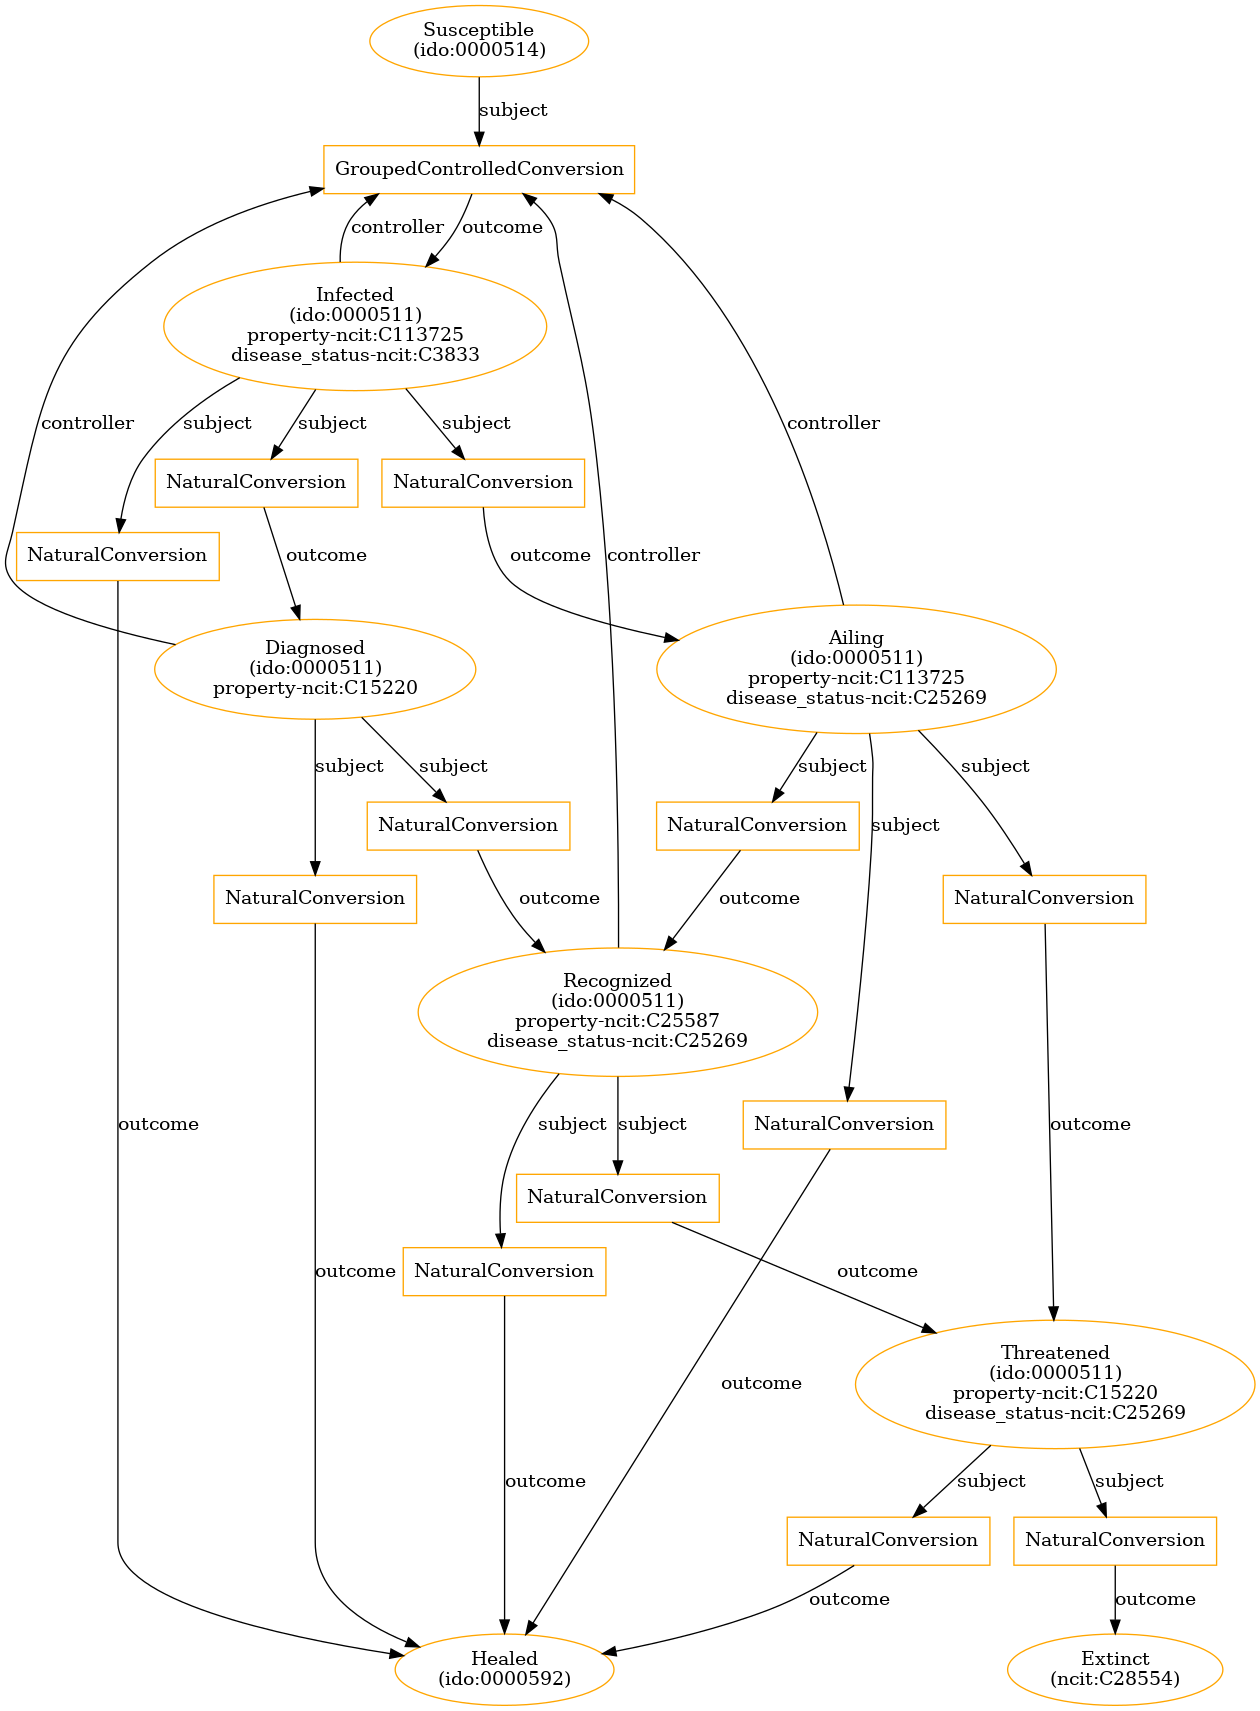

In [8]:
Image('sidarthe.png', width=20)

## Add vaccination
According to the scenario description, vaccination is added to the model and is described in this Nature paper: [https://www.nature.com/articles/s41591-021-01334-5](https://www.nature.com/articles/s41591-021-01334-5), see the graphics of the model here: [https://www.nature.com/articles/s41591-021-01334-5/figures/1](https://www.nature.com/articles/s41591-021-01334-5/figures/1)
The vaccination is added as immunizing vaccination, meaning when someone is vaccinated in this model, they are converted to an end-state in the model.

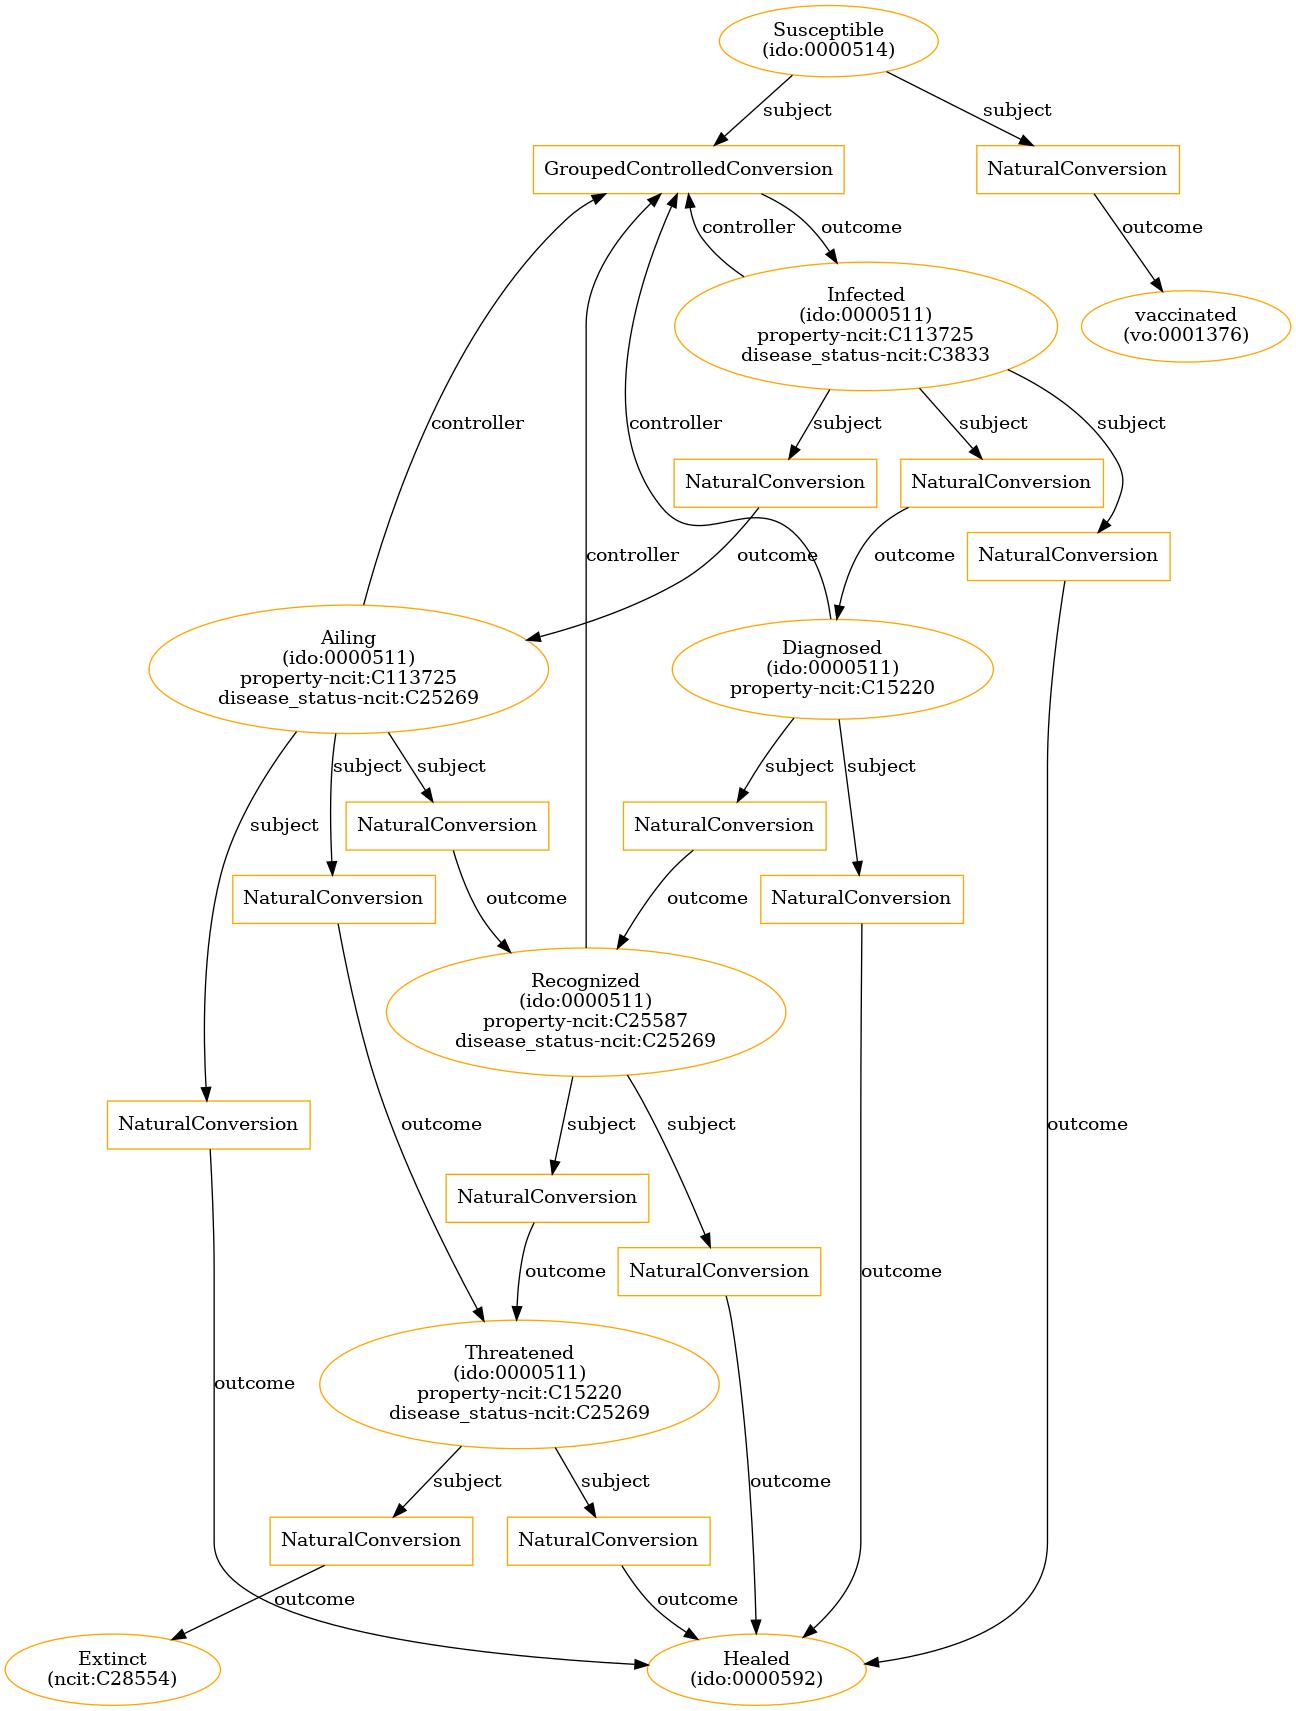

In [9]:
from mira.metamodel import NaturalConversion, GroupedControlledConversion, TemplateModel
from mira.examples.concepts import vaccinated

# Extend the model with vaccination
susceptible = None
for template in sidarthe.templates:
    if isinstance(template, GroupedControlledConversion):
        susceptible = template.subject
        if susceptible.get_curie_str() == "ido:0000514":
            break
assert susceptible is not None

vaccination = NaturalConversion(subject=susceptible, outcome=vaccinated)
sidarthe_v = sidarthe.add_template(vaccination)
sidarthe_v.draw_graph('sidarthe_v.png')
Image('sidarthe_v.png', width=20)